# 4.10 Coding Etiquette & Excel Reporting

## Instacart Grocery Basket Analysis

#### -Errol Hinkamp

##### Table of Contents

1. Import libraries and data
2. Address PII
3. Examine spending habits by region
4. Exclude low-activity customers from dataset
5. Create customer profiling variables
- 5.1 Age
- 5.2 Income
- 5.3 Alcohol
- 5.4 Pets
- 5.5 Children
6. Profile visualizations
- 6.1 Age
- 6.2 Income
- 6.3 Alcohol
- 6.4 Pets
- 6.5 Children
7. Usage frequency and expenditure by customer profile
- 7.1 Usage
 - 7.1.1 Age
 - 7.1.2 Income
 - 7.1.3 Alcohol
 - 7.1.4 Pets
 - 7.1.5 Children
- 7.2 Expenditure
 - 7.2.1 Age
 - 7.2.2 Income
 - 7.2.3 Alcohol
 - 7.2.4 Pets
 - 7.2.5 Children
8. Regional and department sales by customer profile
- 8.1 Total sales by region
 - 8.1.1 Age
 - 8.1.2 Income
 - 8.1.3 Alcohol
 - 8.1.4 Pets
 - 8.1.5 Children
- 8.2 Total sales by department
 - 8.2.1 Age
 - 8.2.2 Income
 - 8.2.3 Alcohol
 - 8.2.4 Pets
 - 8.2.5 Children
9. Data visualizations
- 9.1 Total sales by region
 - 9.1.1 Age
 - 9.1.2 Income
 - 9.1.3 Alcohol
 - 9.1.4 Pets
 - 9.1.5 Children
- 9.2 Total sales by department
 - 9.2.1 Age
 - 9.2.2 Income
 - 9.2.3 Alcohol
 - 9.2.4 Pets
 - 9.2.5 Children
10. Export final dataset

# 1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import dataframe
path=r'C:\Users\Errol\Documents\Data Analyst Work\Achievement 4\Instacart Basket Analysis'
bigmerged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'bigmerged_4.9.2.pkl'))

In [3]:
# Disable row limits
pd.options.display.max_rows = None

In [4]:
# Disable column limits
pd.options.display.max_columns = None

In [5]:
# Quick visual check of data
bigmerged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,frequency_flag,First Name,Last Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,3144955,10331,4,5,11,30.0,196,3,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Marilyn,Olsen,Female,North Dakota,24,1/6/2017,3,married,73639
1,2300470,10331,1,2,14,NaN,21386,2,0,Smartwater,115,7,11.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Marilyn,Olsen,Female,North Dakota,24,1/6/2017,3,married,73639
2,1922742,10331,2,5,11,10.0,21386,2,1,Smartwater,115,7,11.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Marilyn,Olsen,Female,North Dakota,24,1/6/2017,3,married,73639
3,2300470,10331,1,2,14,NaN,42500,1,0,Orange & Lemon Flavor Variety Pack Sparkling F...,77,7,6.6,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Marilyn,Olsen,Female,North Dakota,24,1/6/2017,3,married,73639
4,1922742,10331,2,5,11,10.0,42500,3,1,Orange & Lemon Flavor Variety Pack Sparkling F...,77,7,6.6,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Marilyn,Olsen,Female,North Dakota,24,1/6/2017,3,married,73639


In [6]:
# Basic dataframe info
bigmerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32399732 entries, 0 to 32399731
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int64  
 1   user_id                int64  
 2   order_number           int64  
 3   orders_day_of_week     int64  
 4   order_hour_of_day      int64  
 5   days_since_last_order  float64
 6   product_id             int64  
 7   add_to_cart_order      int64  
 8   reordered              int64  
 9   product_name           object 
 10  aisle_id               int64  
 11  department_id          int64  
 12  prices                 float64
 13  price_range_loc        object 
 14  busiest_days           object 
 15  busiest_period_of_day  object 
 16  max_order              int64  
 17  loyalty_flag           object 
 18  spending_flag          object 
 19  frequency_flag         object 
 20  First Name             object 
 21  Last Name              object 
 22  Gender          

# 2. Address PII

In [7]:
# Remove "First Name" and "Last Name" columns
bigmerged=bigmerged.drop(columns = ['First Name','Last Name'])

In [8]:
# Quick visual check of data
bigmerged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,3144955,10331,4,5,11,30.0,196,3,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639
1,2300470,10331,1,2,14,NaN,21386,2,0,Smartwater,115,7,11.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639
2,1922742,10331,2,5,11,10.0,21386,2,1,Smartwater,115,7,11.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639
3,2300470,10331,1,2,14,NaN,42500,1,0,Orange & Lemon Flavor Variety Pack Sparkling F...,77,7,6.6,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639
4,1922742,10331,2,5,11,10.0,42500,3,1,Orange & Lemon Flavor Variety Pack Sparkling F...,77,7,6.6,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639


# 3. Examine spending habits by region

In [9]:
# Add region column based on state
bigmerged.loc[bigmerged['STATE'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']), 'Region'] = 'Northeast'
bigmerged.loc[bigmerged['STATE'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']), 'Region'] = 'Midwest'
bigmerged.loc[bigmerged['STATE'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']), 'Region'] = 'South'
bigmerged.loc[bigmerged['STATE'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']), 'Region'] = 'West'

In [10]:
# Quick visual check
bigmerged.head(50)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region
0,3144955,10331,4,5,11,30.0,196,3,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639,Midwest
1,2300470,10331,1,2,14,NaN,21386,2,0,Smartwater,115,7,11.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639,Midwest
2,1922742,10331,2,5,11,10.0,21386,2,1,Smartwater,115,7,11.0,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639,Midwest
3,2300470,10331,1,2,14,NaN,42500,1,0,Orange & Lemon Flavor Variety Pack Sparkling F...,77,7,6.6,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639,Midwest
4,1922742,10331,2,5,11,10.0,42500,3,1,Orange & Lemon Flavor Variety Pack Sparkling F...,77,7,6.6,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639,Midwest
5,1922742,10331,2,5,11,10.0,45511,1,0,Extra Beer Bottles,27,5,13.3,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639,Midwest
6,3144955,10331,4,5,11,30.0,45511,2,1,Extra Beer Bottles,27,5,13.3,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639,Midwest
7,1922742,10331,2,5,11,10.0,43892,4,0,Premium Belgian Lager,27,5,6.6,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639,Midwest
8,769725,10331,3,2,19,30.0,43892,1,1,Premium Belgian Lager,27,5,6.6,Mid-range product,Regularly busy,Average orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639,Midwest
9,3144955,10331,4,5,11,30.0,43892,1,1,Premium Belgian Lager,27,5,6.6,Mid-range product,Regularly busy,Most orders,4,New customer,Low spender,Regular customer,Female,North Dakota,24,1/6/2017,3,married,73639,Midwest


In [11]:
# Confirm all entries have a region assigned
bigmerged['Region'].value_counts(dropna=False)

South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: Region, dtype: int64

##### Making a crosstab on the full dataset is misleading, as it would count each instance of each flag, even though a single order may generate multiple such flags. I will trim the dataset to only contain a single entry for each user id so that a direct comparison of the number of high spenders to low spenders can be made.

In [12]:
# Create subset containing only user ids, spending flags, and regions
region = bigmerged[['user_id', 'spending_flag', 'Region']]

In [13]:
# Quick check of subset
region.shape

(32399732, 3)

In [14]:
# Remove duplicates from subset
region=region.drop_duplicates()

In [15]:
# Quick check of subset
region.shape

(206209, 3)

In [16]:
# Create crosstab of spending flag vs region
pd.crosstab(region['Region'], region['spending_flag'], values=region['spending_flag'], aggfunc='count', dropna = False)

spending_flag,High spender,Low spender
Region,,
Midwest,798,47721
Northeast,544,35844
South,1140,67597
West,901,51664


In [17]:
# Calculate % of high spenders per region
# Midwest
798/(798+47721)*100

1.6447165028133308

In [18]:
# Northeast
544/(544+35844)*100

1.4949983511047598

In [19]:
# South
1140/(1140+67597)*100

1.658495424589377

In [20]:
# West
901/(901+51664)*100

1.7140682963949396

##### In all four regions, only about 1.6% of total customers were considered "high spenders." No significant difference between regions.

# 4. Exlude low-activity customers from dataset

In [21]:
# Create exclusion flag for low-activity customers
bigmerged.loc[bigmerged['max_order'] < 5, 'activity_flag'] = 'Low activity'
bigmerged.loc[bigmerged['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [22]:
# Check exclusion flag
bigmerged['activity_flag'].value_counts(dropna=False)

Normal activity    30959687
Low activity        1440045
Name: activity_flag, dtype: int64

In [23]:
# Drop "max orders" column to save memory and because it no longer serves a purpose
bigmerged = bigmerged.drop(columns = ['max_order'])

In [25]:
# Create dataset without low-activity customers (overwrite existing set to save memory)
bigmerged = bigmerged[bigmerged['activity_flag'] == 'Normal activity']

In [26]:
# Quick visual check
bigmerged.head(50)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,activity_flag
10,265153,11282,1,4,11,NaN,196,3,0,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
11,1466390,11282,3,5,13,5.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
12,1305203,11282,4,4,16,13.0,196,4,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
13,2134557,11282,5,0,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
14,3371763,11282,8,4,17,24.0,196,2,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
15,2406075,11282,11,3,12,19.0,196,4,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
16,1762105,11282,9,3,16,13.0,36227,3,0,Sour Cream & Onion Flavored Potato Crisps,107,19,4.7,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
17,1762105,11282,9,3,16,13.0,43409,5,0,Frosted Mini-Wheats Original Cereal,121,14,11.1,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
18,265153,11282,1,4,11,NaN,32655,2,0,Organic Large Grade AA Brown Eggs,86,16,1.1,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity
19,1305203,11282,4,4,16,13.0,32655,2,1,Organic Large Grade AA Brown Eggs,86,16,1.1,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity


In [27]:
# Confirm rows have been removed
bigmerged.shape

(30959687, 28)

In [28]:
# Export trimmed dataset
bigmerged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'bigmerged_4.10.trimmed.pkl'))

# 5. Create customer profiling variables

### 5.1 Age

In [29]:
# Check min of "Age" column
bigmerged['Age'].min()

18

In [30]:
# Check max of "Age" column
bigmerged['Age'].max()

81

In [31]:
# Create age categories
bigmerged.loc[(bigmerged['Age'] >= 18) & (bigmerged['Age'] < 23), 'age_category'] = '18-22'
bigmerged.loc[(bigmerged['Age'] >= 23) & (bigmerged['Age'] < 30), 'age_category'] = '23-29'
bigmerged.loc[(bigmerged['Age'] >= 30) & (bigmerged['Age'] < 40), 'age_category'] = '30-39'
bigmerged.loc[(bigmerged['Age'] >= 40) & (bigmerged['Age'] < 50), 'age_category'] = '40-49'
bigmerged.loc[(bigmerged['Age'] >= 50) & (bigmerged['Age'] < 60), 'age_category'] = '50-59'
bigmerged.loc[(bigmerged['Age'] >= 60) & (bigmerged['Age'] < 70), 'age_category'] = '60-69'
bigmerged.loc[(bigmerged['Age'] >= 70) & (bigmerged['Age'] < 80), 'age_category'] = '70-79'
bigmerged.loc[bigmerged['Age'] >= 80, 'age_category'] = '80+'

In [32]:
# Check age categories
bigmerged['age_category'].value_counts(dropna=False).sort_index()

18-22    2434313
23-29    3382319
30-39    4846808
40-49    4882358
50-59    4841032
60-69    4760918
70-79    4833476
80+       978463
Name: age_category, dtype: int64

### 5.2 Income

In [33]:
# Check min of "income" column
bigmerged['income'].min()

25903

In [34]:
# Check max of "income" column
bigmerged['income'].max()

593901

In [35]:
# Check median of "income" column
bigmerged['income'].median()

96761.0

In [36]:
# Create income categories
bigmerged.loc[bigmerged['income'] < 30000, 'income_category'] = '<30k'
bigmerged.loc[(bigmerged['income'] >= 30000) & (bigmerged['income'] < 60000), 'income_category'] = '30k-59k'
bigmerged.loc[(bigmerged['income'] >= 60000) & (bigmerged['income'] < 90000), 'income_category'] = '60k-89k'
bigmerged.loc[(bigmerged['income'] >= 90000) & (bigmerged['income'] < 120000), 'income_category'] = '90k-119k'
bigmerged.loc[(bigmerged['income'] >= 120000) & (bigmerged['income'] < 150000), 'income_category'] = '120k-149k'
bigmerged.loc[bigmerged['income'] >= 150000, 'income_category'] = '>150k'

In [37]:
# Check income categories
bigmerged['income_category'].value_counts(dropna=False).sort_index()

120k-149k    5283958
30k-59k      5608877
60k-89k      7331823
90k-119k     8649578
<30k          193870
>150k        3891581
Name: income_category, dtype: int64

### 5.3 Alcohol

In [38]:
# Create subset containing only department ids and user ids
department = bigmerged[['department_id','user_id']]

In [39]:
# Filter to show only alcohol purchases
alcohol =  department[department['department_id']==5]

In [40]:
# Quick check of subset
alcohol.shape

(144627, 2)

In [41]:
# Remove duplicates from subset
alcohol=alcohol.drop_duplicates()

In [42]:
# Quick check of subset
alcohol.shape

(13151, 2)

In [43]:
# Add drinker/non-drinker tags based on whether user id has purchased alcohol
bigmerged.loc[bigmerged['user_id'].isin(alcohol['user_id']), 'alcohol_tag'] = 'Drinker'
bigmerged.loc[~bigmerged['user_id'].isin(alcohol['user_id']), 'alcohol_tag'] = 'Non-drinker'

In [44]:
# Quick visual check
bigmerged.head(50)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,activity_flag,age_category,income_category,alcohol_tag
10,265153,11282,1,4,11,NaN,196,3,0,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker
11,1466390,11282,3,5,13,5.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker
12,1305203,11282,4,4,16,13.0,196,4,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker
13,2134557,11282,5,0,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker
14,3371763,11282,8,4,17,24.0,196,2,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker
15,2406075,11282,11,3,12,19.0,196,4,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker
16,1762105,11282,9,3,16,13.0,36227,3,0,Sour Cream & Onion Flavored Potato Crisps,107,19,4.7,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker
17,1762105,11282,9,3,16,13.0,43409,5,0,Frosted Mini-Wheats Original Cereal,121,14,11.1,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker
18,265153,11282,1,4,11,NaN,32655,2,0,Organic Large Grade AA Brown Eggs,86,16,1.1,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker
19,1305203,11282,4,4,16,13.0,32655,2,1,Organic Large Grade AA Brown Eggs,86,16,1.1,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker


In [45]:
# Check drinker tag
bigmerged['alcohol_tag'].value_counts(dropna=False)

Non-drinker    28631087
Drinker         2328600
Name: alcohol_tag, dtype: int64

### 5.4 Pets

In [46]:
# Filter department subset to show only pet-related purchases
pets =  department[department['department_id']==8]

In [47]:
# Quick check of subset
pets.shape

(93060, 2)

In [48]:
# Remove duplicates from subset
pets=pets.drop_duplicates()

In [49]:
# Quick check of subset
pets.shape

(13175, 2)

In [50]:
# Add pet-owner/non-pet-owner tags based on whether user id has purchased pet supplies
bigmerged.loc[bigmerged['user_id'].isin(pets['user_id']), 'pet_tag'] = 'Pet owner'
bigmerged.loc[~bigmerged['user_id'].isin(pets['user_id']), 'pet_tag'] = 'No pets'

In [51]:
# Quick visual check
bigmerged.head(50)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,activity_flag,age_category,income_category,alcohol_tag,pet_tag
10,265153,11282,1,4,11,NaN,196,3,0,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner
11,1466390,11282,3,5,13,5.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner
12,1305203,11282,4,4,16,13.0,196,4,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner
13,2134557,11282,5,0,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner
14,3371763,11282,8,4,17,24.0,196,2,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner
15,2406075,11282,11,3,12,19.0,196,4,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner
16,1762105,11282,9,3,16,13.0,36227,3,0,Sour Cream & Onion Flavored Potato Crisps,107,19,4.7,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner
17,1762105,11282,9,3,16,13.0,43409,5,0,Frosted Mini-Wheats Original Cereal,121,14,11.1,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner
18,265153,11282,1,4,11,NaN,32655,2,0,Organic Large Grade AA Brown Eggs,86,16,1.1,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner
19,1305203,11282,4,4,16,13.0,32655,2,1,Organic Large Grade AA Brown Eggs,86,16,1.1,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner


In [52]:
# Check pet tag
bigmerged['pet_tag'].value_counts(dropna=False)

No pets      27509293
Pet owner     3450394
Name: pet_tag, dtype: int64

### 5.5 Children

In [53]:
# Check min of dependents column
bigmerged['n_dependants'].min()

0

In [54]:
# Check max of dependents column
bigmerged['n_dependants'].max()

3

In [55]:
# Create parent tag
bigmerged.loc[bigmerged['n_dependants'] <= 0, 'parent_tag'] = 'No kids'
bigmerged.loc[bigmerged['n_dependants'] > 0, 'parent_tag'] = 'Parent'

In [56]:
# Quick visual check
bigmerged.head(50)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,activity_flag,age_category,income_category,alcohol_tag,pet_tag,parent_tag
10,265153,11282,1,4,11,NaN,196,3,0,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent
11,1466390,11282,3,5,13,5.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent
12,1305203,11282,4,4,16,13.0,196,4,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent
13,2134557,11282,5,0,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent
14,3371763,11282,8,4,17,24.0,196,2,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent
15,2406075,11282,11,3,12,19.0,196,4,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent
16,1762105,11282,9,3,16,13.0,36227,3,0,Sour Cream & Onion Flavored Potato Crisps,107,19,4.7,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent
17,1762105,11282,9,3,16,13.0,43409,5,0,Frosted Mini-Wheats Original Cereal,121,14,11.1,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent
18,265153,11282,1,4,11,NaN,32655,2,0,Organic Large Grade AA Brown Eggs,86,16,1.1,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent
19,1305203,11282,4,4,16,13.0,32655,2,1,Organic Large Grade AA Brown Eggs,86,16,1.1,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent


In [57]:
# Check parent tag
bigmerged['parent_tag'].value_counts(dropna=False)

Parent     23221179
No kids     7738508
Name: parent_tag, dtype: int64

# 6. Profile visualizations

### 6.1 Age

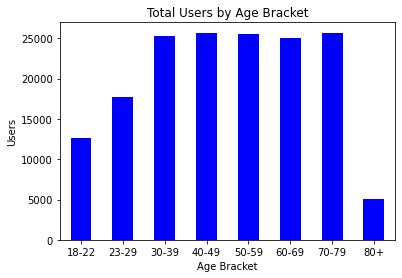

In [58]:
# Create & save bar chart of customer age bracket breakdown
age_breakdown_bar=bigmerged.groupby('age_category')['user_id'].nunique().plot.bar(xlabel='Age Bracket', ylabel='Users', title='Total Users by Age Bracket', rot=0, color='blue')

In [59]:
# Export chart
age_breakdown_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_breakdown_bar.png'))

### 6.2 Income

In [60]:
# Create new dataframe for use in seaborn bar plot--use seaborn in order to customize order of x-axis categories
inc_userid=bigmerged.groupby('income_category')['user_id'].nunique().reset_index()
inc_userid.columns=['income_category', 'user_ids']

Text(0.5, 1.0, 'Total Users by Income Bracket')

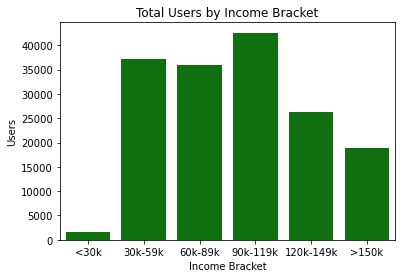

In [61]:
# Create & save bar chart of customer income bracket breakdown
income_breakdown_bar=sns.barplot (data=inc_userid, x='income_category', y='user_ids', order=['<30k', '30k-59k', '60k-89k', '90k-119k', '120k-149k', '>150k'], color='green')
plt.xlabel("Income Bracket")
plt.ylabel("Users")
plt.title("Total Users by Income Bracket")

In [62]:
# Export chart
income_breakdown_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_breakdown_bar.png'))

### 6.3 Alcohol

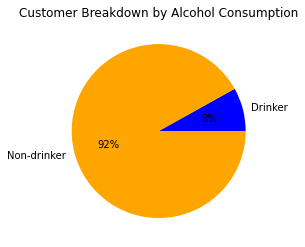

In [63]:
# Create & save pie chart of customer alcohol tag breakdown
alcohol_breakdown_pie=bigmerged.groupby('alcohol_tag')['user_id'].nunique().plot.pie(ylabel='', title='Customer Breakdown by Alcohol Consumption', autopct='%1.0f%%', colors=['blue','orange'])

In [64]:
# Export chart
alcohol_breakdown_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'alcohol_breakdown_pie.png'))

### 6.4 Pets

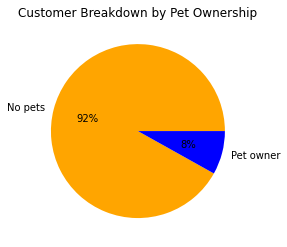

In [65]:
# Create & save pie chart of customer pet tag breakdown
pet_breakdown_pie=bigmerged.groupby('pet_tag')['user_id'].nunique().plot.pie(ylabel='', title='Customer Breakdown by Pet Ownership', autopct='%1.0f%%', colors=['orange','blue'])

In [66]:
# Export chart
pet_breakdown_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_breakdown_pie.png'))

### 6.5 Children

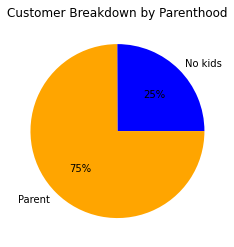

In [67]:
# Create & save pie chart of customer parent tag breakdown
parent_breakdown_pie=bigmerged.groupby('parent_tag')['user_id'].nunique().plot.pie(ylabel='', title='Customer Breakdown by Parenthood', autopct='%1.0f%%', colors=['blue','orange'])

In [68]:
# Export chart
parent_breakdown_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_breakdown_pie.png'))

# 7. Usage frequency and expenditure by customer profile

### 7.1 Usage

##### Crunching the numbers on the full dataset is misleading, as each unique order id may contain a number of different items, each with an identical "days since last order" value. I will trim the dataset to only contain a single entry for each order id, and thus only a single "days since last order" value.

In [69]:
# Create subset containing only order ids, days since last order, age & income categories, and alcohol/pets/children flags
orders = bigmerged[['order_id','days_since_last_order','age_category','income_category','alcohol_tag','pet_tag','parent_tag']]

In [70]:
# Remove duplicates from subset
orders=orders.drop_duplicates()

In [71]:
# Check shape of subset
orders.shape

(3064358, 7)

#### 7.1.1 Age

In [72]:
# Calculate usage stats by age bracket
orders.groupby('age_category').agg({'days_since_last_order': ['min', 'mean', 'max']})

days_since_last_order                 
                               min       mean   max
age_category                                       
18-22                          0.0  10.335878  30.0
23-29                          0.0  10.448610  30.0
30-39                          0.0  10.402160  30.0
40-49                          0.0  10.370709  30.0
50-59                          0.0  10.365495  30.0
60-69                          0.0  10.397286  30.0
70-79                          0.0  10.401927  30.0
80+                            0.0  10.253437  30.0

#### 7.1.2 Income

In [73]:
# Calculate usage stats by income bracket
orders.groupby('income_category').agg({'days_since_last_order': ['min', 'mean', 'max']})

days_since_last_order                 
                                  min       mean   max
income_category                                       
120k-149k                         0.0  10.312501  30.0
30k-59k                           0.0  10.833732  30.0
60k-89k                           0.0  10.213955  30.0
90k-119k                          0.0  10.290133  30.0
<30k                              0.0  11.676352  30.0
>150k                             0.0  10.140782  30.0

#### 7.1.3 Alcohol

In [74]:
# Calculate usage stats by alcohol consumption
orders.groupby('alcohol_tag').agg({'days_since_last_order': ['min', 'mean', 'max']})

days_since_last_order                 
                              min       mean   max
alcohol_tag                                       
Drinker                       0.0  10.052842  30.0
Non-drinker                   0.0  10.414522  30.0

#### 7.1.4 Pets

In [75]:
# Calculate usage stats by pet ownership
orders.groupby('pet_tag').agg({'days_since_last_order': ['min', 'mean', 'max']})

days_since_last_order                 
                            min       mean   max
pet_tag                                         
No pets                     0.0  10.482239  30.0
Pet owner                   0.0   9.500102  30.0

#### 7.1.5 Children

In [76]:
# Calculate usage by parent status
orders.groupby('parent_tag').agg({'days_since_last_order': ['min', 'mean', 'max']})

days_since_last_order                 
                             min       mean   max
parent_tag                                       
No kids                      0.0  10.378144  30.0
Parent                       0.0  10.388232  30.0

### 7.2 Expenditure

##### Crunching the numbers on the full dataset is misleading, as it is based on the prices of each individual item purchased across all customers and doesn't really tell us anything useful. A better metric is the total amount spent per unique user id, which I have done.

In [77]:
# Create subset containing only user ids, prices, age & income categories, and alcohol/pets/children flags
prices = bigmerged[['user_id','prices','age_category', 'income_category','alcohol_tag','pet_tag','parent_tag']]

In [78]:
# Add "total spent by user" column
prices['total_spent_by_user'] = prices.groupby(['user_id'])['prices'].transform(np.sum)

<ipython-input-78-0a94a7998534>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['total_spent_by_user'] = prices.groupby(['user_id'])['prices'].transform(np.sum)


In [79]:
# Quick visual check of subset
prices.head(50)

,user_id,prices,age_category,income_category,alcohol_tag,pet_tag,parent_tag,total_spent_by_user
10,11282,9.0,40-49,>150k,Non-drinker,Pet owner,Parent,421.0
11,11282,9.0,40-49,>150k,Non-drinker,Pet owner,Parent,421.0
12,11282,9.0,40-49,>150k,Non-drinker,Pet owner,Parent,421.0
13,11282,9.0,40-49,>150k,Non-drinker,Pet owner,Parent,421.0
14,11282,9.0,40-49,>150k,Non-drinker,Pet owner,Parent,421.0
15,11282,9.0,40-49,>150k,Non-drinker,Pet owner,Parent,421.0
16,11282,4.7,40-49,>150k,Non-drinker,Pet owner,Parent,421.0
17,11282,11.1,40-49,>150k,Non-drinker,Pet owner,Parent,421.0
18,11282,1.1,40-49,>150k,Non-drinker,Pet owner,Parent,421.0
19,11282,1.1,40-49,>150k,Non-drinker,Pet owner,Parent,421.0


In [80]:
# Check subset shape
prices.shape

(30959687, 8)

In [81]:
# Drop prices column
prices = prices.drop(columns = ['prices'])

In [82]:
# Remove duplicates from subset
prices=prices.drop_duplicates()

In [83]:
# Check subset shape
prices.shape

(162631, 7)

In [84]:
# Quick visual check of subset
prices.head(50)

,user_id,age_category,income_category,alcohol_tag,pet_tag,parent_tag,total_spent_by_user
10,11282,40-49,>150k,Non-drinker,Pet owner,Parent,421.0
65,26711,40-49,>150k,Non-drinker,No pets,Parent,143.8
83,30968,70-79,90k-119k,Non-drinker,Pet owner,Parent,748.5
179,32095,23-29,30k-59k,Non-drinker,No pets,Parent,443.1
260,33890,30-39,30k-59k,Non-drinker,No pets,No kids,515.2
333,37883,40-49,90k-119k,Non-drinker,No pets,Parent,213.0
362,51556,18-22,60k-89k,Non-drinker,No pets,Parent,242.5
389,53065,18-22,30k-59k,Non-drinker,No pets,No kids,4049.2
930,59989,30-39,30k-59k,Drinker,No pets,Parent,885.8
1043,64609,50-59,30k-59k,Non-drinker,No pets,Parent,836.2


#### 7.2.1 Age

In [85]:
# Calculate expenditure stats by age bracket
prices.groupby('age_category').agg({'total_spent_by_user': ['min', 'mean', 'max']})

total_spent_by_user                      
                             min         mean      max
age_category                                          
18-22                       12.0  1496.587980  18436.9
23-29                       10.5  1485.620836  18883.2
30-39                        7.0  1492.910675  22696.9
40-49                       10.4  1481.642612  21509.2
50-59                        5.0  1477.878942  20315.1
60-69                       11.4  1479.763609  26394.9
70-79                        6.8  1470.545633  22777.9
80+                         12.0  1504.453084  17485.8

#### 7.2.2 Income

In [86]:
# Calculate expenditure stats by income bracket
prices.groupby('income_category').agg({'total_spent_by_user': ['min', 'mean', 'max']})

total_spent_by_user                      
                                min         mean      max
income_category                                          
120k-149k                      24.7  1594.562110  22595.5
30k-59k                         5.0  1069.601125  24307.1
60k-89k                        36.5  1621.240396  22696.9
90k-119k                       38.6  1616.611832  26394.9
<30k                           12.0   811.843462   9273.5
>150k                          39.5  1633.908053  17435.6

#### 7.2.3 Alcohol

In [87]:
# Calculate expenditure stats by alcohol consumption
prices.groupby('alcohol_tag').agg({'total_spent_by_user': ['min', 'mean', 'max']})

total_spent_by_user                      
                            min         mean      max
alcohol_tag                                          
Drinker                    15.6  1377.493810  18138.2
Non-drinker                 5.0  1492.365631  26394.9

#### 7.2.4 Pets

In [88]:
# Calculate expenditure stats by pet ownership
prices.groupby('pet_tag').agg({'total_spent_by_user': ['min', 'mean', 'max']})

total_spent_by_user                      
                          min         mean      max
pet_tag                                            
No pets                   5.0  1433.469986  26394.9
Pet owner                24.9  2045.809898  17430.5

#### 7.2.5 Children

In [89]:
# Calculate expenditure stats by parent status
prices.groupby('parent_tag').agg({'total_spent_by_user': ['min', 'mean', 'max']})

total_spent_by_user                      
                           min         mean      max
parent_tag                                          
No kids                    5.0  1480.086741  24307.1
Parent                     6.8  1484.075526  26394.9

# 8. Regional and department sales by customer profile

### 8.1 Total sales by region

#### 8.1.1 Age

In [90]:
# Make crosstab of total sales by age category and region
crosstab_sales_region_age=pd.crosstab(bigmerged['age_category'], bigmerged['Region'], values=bigmerged['prices'], aggfunc='sum').round(2)

In [91]:
# View crosstab
crosstab_sales_region_age

Region,Midwest,Northeast,South,West
age_category,,,,
18-22,4513943.2,3308290.6,6443716.0,4697316.5
23-29,6070946.1,4627114.1,8812133.6,6792723.1
30-39,8763171.5,6601803.8,12841623.3,9540154.9
40-49,9159504.4,6695984.5,12484102.4,9734178.9
50-59,8944521.0,6592732.6,12322812.5,9827324.8
60-69,8629870.9,6578344.0,12410425.3,9514547.8
70-79,8667158.0,6787025.5,12619183.2,9578483.7
80+,1825498.7,1325579.6,2422324.9,2061696.2


#### 8.1.2 Income

In [92]:
# Make crosstab of total sales by income category and region
crosstab_sales_region_income=pd.crosstab(bigmerged['income_category'], bigmerged['Region'], values=bigmerged['prices'], aggfunc='sum').round(2)

In [93]:
# View crosstab
crosstab_sales_region_income

Region,Midwest,Northeast,South,West
income_category,,,,
120k-149k,10108063.4,7560890.6,13816770.1,10577229.8
30k-59k,9160973.9,7000171.9,13497245.5,10178902.6
60k-89k,13570850.3,10121872.2,19574874.1,15022480.6
90k-119k,16123236.7,12230963.7,22796254.4,17684877.0
<30k,345507.8,218163.1,427476.0,275328.9
>150k,7265981.7,5384813.2,10243701.1,8007607.0


#### 8.1.3 Alcohol

In [94]:
# Make crosstab of total sales by alcohol consumption and region
crosstab_sales_region_alcohol=pd.crosstab(bigmerged['alcohol_tag'], bigmerged['Region'], values=bigmerged['prices'], aggfunc='sum').round(2)

In [95]:
# View crosstab
crosstab_sales_region_alcohol

Region,Midwest,Northeast,South,West
alcohol_tag,,,,
Drinker,4250593.1,3040434.0,6127004.6,4697389.4
Non-drinker,52324020.7,39476440.7,74229316.6,57049036.5


#### 8.1.4 Pets

In [96]:
# Make crosstab of total sales by pet ownership and region
crosstab_sales_region_pets=pd.crosstab(bigmerged['pet_tag'], bigmerged['Region'], values=bigmerged['prices'], aggfunc='sum').round(2)

In [97]:
# View crosstab
crosstab_sales_region_pets

Region,Midwest,Northeast,South,West
pet_tag,,,,
No pets,50106267.0,37857433.7,71616108.0,54660881.5
Pet owner,6468346.8,4659441.0,8740213.2,7085544.4


#### 8.1.5 Children

In [98]:
# Make crosstab of total sales by parent status and region
crosstab_sales_region_parent=pd.crosstab(bigmerged['parent_tag'], bigmerged['Region'], values=bigmerged['prices'], aggfunc='sum').round(2)

In [99]:
# View crosstab
crosstab_sales_region_parent

Region,Midwest,Northeast,South,West
parent_tag,,,,
No kids,14205230.0,10543845.0,20122362.6,15408055.1
Parent,42369383.8,31973029.7,60233958.6,46338370.8


### 8.2 Total sales by department

##### For the sake of user-friendliness, I supplement department ids with proper department names.

In [100]:
# Add "department name" column
bigmerged.loc[bigmerged['department_id'] == 1, 'department_name'] = 'frozen'
bigmerged.loc[bigmerged['department_id'] == 2, 'department_name'] = 'other'
bigmerged.loc[bigmerged['department_id'] == 3, 'department_name'] = 'bakery'
bigmerged.loc[bigmerged['department_id'] == 4, 'department_name'] = 'produce'
bigmerged.loc[bigmerged['department_id'] == 5, 'department_name'] = 'alcohol'
bigmerged.loc[bigmerged['department_id'] == 6, 'department_name'] = 'international'
bigmerged.loc[bigmerged['department_id'] == 7, 'department_name'] = 'beverages'
bigmerged.loc[bigmerged['department_id'] == 8, 'department_name'] = 'pets'
bigmerged.loc[bigmerged['department_id'] == 9, 'department_name'] = 'dry goods pasta'
bigmerged.loc[bigmerged['department_id'] == 10, 'department_name'] = 'bulk'
bigmerged.loc[bigmerged['department_id'] == 11, 'department_name'] = 'personal care'
bigmerged.loc[bigmerged['department_id'] == 12, 'department_name'] = 'meat seafood'
bigmerged.loc[bigmerged['department_id'] == 13, 'department_name'] = 'pantry'
bigmerged.loc[bigmerged['department_id'] == 14, 'department_name'] = 'breakfast'
bigmerged.loc[bigmerged['department_id'] == 15, 'department_name'] = 'canned goods'
bigmerged.loc[bigmerged['department_id'] == 16, 'department_name'] = 'dairy eggs'
bigmerged.loc[bigmerged['department_id'] == 17, 'department_name'] = 'household'
bigmerged.loc[bigmerged['department_id'] == 18, 'department_name'] = 'babies'
bigmerged.loc[bigmerged['department_id'] == 19, 'department_name'] = 'snacks'
bigmerged.loc[bigmerged['department_id'] == 20, 'department_name'] = 'deli'
bigmerged.loc[bigmerged['department_id'] == 21, 'department_name'] = 'missing'

In [101]:
# Quick visual check
bigmerged.head(50)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,activity_flag,age_category,income_category,alcohol_tag,pet_tag,parent_tag,department_name
10,265153,11282,1,4,11,NaN,196,3,0,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent,beverages
11,1466390,11282,3,5,13,5.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent,beverages
12,1305203,11282,4,4,16,13.0,196,4,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent,beverages
13,2134557,11282,5,0,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent,beverages
14,3371763,11282,8,4,17,24.0,196,2,1,Soda,77,7,9.0,Mid-range product,Slowest days,Average orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent,beverages
15,2406075,11282,11,3,12,19.0,196,4,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent,beverages
16,1762105,11282,9,3,16,13.0,36227,3,0,Sour Cream & Onion Flavored Potato Crisps,107,19,4.7,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent,snacks
17,1762105,11282,9,3,16,13.0,43409,5,0,Frosted Mini-Wheats Original Cereal,121,14,11.1,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent,breakfast
18,265153,11282,1,4,11,NaN,32655,2,0,Organic Large Grade AA Brown Eggs,86,16,1.1,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent,dairy eggs
19,1305203,11282,4,4,16,13.0,32655,2,1,Organic Large Grade AA Brown Eggs,86,16,1.1,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Regular customer,Female,Georgia,42,1/4/2017,2,married,160407,South,Normal activity,40-49,>150k,Non-drinker,Pet owner,Parent,dairy eggs


#### 8.2.1 Age

In [102]:
# Make crosstab of total sales by age category and department
crosstab_sales_department_age=pd.crosstab(bigmerged['department_name'], bigmerged['age_category'], values=bigmerged['prices'], aggfunc='sum').round(2)

In [103]:
# View crosstab
crosstab_sales_department_age

age_category,18-22,23-29,30-39,40-49,50-59,60-69,70-79,80+
department_name,,,,,,,,
alcohol,105850.2,121642.1,193226.6,184050.6,186325.4,173895.3,183909.2,29911.7
babies,246894.8,349266.0,488120.1,510117.8,478073.4,481576.6,482630.3,96417.4
bakery,695218.7,959429.8,1376926.0,1387953.5,1373900.0,1354981.0,1377508.2,280969.0
beverages,1515105.3,2144024.9,3061359.8,3116957.2,3127639.7,3030241.2,3135829.1,627616.7
breakfast,433659.6,593171.6,835098.5,857276.0,842643.8,818703.6,833624.7,173852.4
bulk,22193.2,31478.3,43202.1,45268.5,41959.8,42798.1,42396.0,9916.8
canned goods,591460.7,855271.8,1192871.7,1195670.0,1198424.5,1181943.6,1184429.7,237706.5
dairy eggs,3406690.8,4720687.3,6800867.2,6835457.5,6661938.9,6579800.9,6763911.4,1348906.7
deli,610467.1,856666.6,1214277.7,1241327.7,1213347.0,1214581.1,1215160.7,247360.2


#### 8.2.2 Income

In [104]:
# Make crosstab of total sales by income category and department
crosstab_sales_department_income=pd.crosstab(bigmerged['department_name'], bigmerged['income_category'], values=bigmerged['prices'], aggfunc='sum').round(2)

In [105]:
# View crosstab
crosstab_sales_department_income

income_category,120k-149k,30k-59k,60k-89k,90k-119k,<30k,>150k
department_name,,,,,,
alcohol,188421.0,203068.6,257893.4,320615.7,8661.9,200150.5
babies,566731.4,409461.2,816099.9,926115.0,10776.2,403912.7
bakery,1546830.7,1373847.1,2137533.1,2537250.6,40977.1,1170447.6
beverages,3295931.0,4000309.7,4479083.8,5351930.4,154913.2,2476605.8
breakfast,888197.8,1055676.0,1245189.0,1477277.3,34086.8,687603.3
bulk,45067.7,54643.5,68649.9,77203.1,2355.7,31292.9
canned goods,1378804.7,1107465.4,1891560.2,2229727.1,28414.7,1001806.4
dairy eggs,7586463.9,6728813.5,10564036.4,12496244.6,201759.6,5540942.7
deli,1350803.3,1280203.2,1883287.3,2258776.4,45066.9,995051.0


#### 8.2.3 Alcohol

In [106]:
# Make crosstab of total sales by alcohol consumption and department
crosstab_sales_department_alcohol=pd.crosstab(bigmerged['department_name'], bigmerged['alcohol_tag'], values=bigmerged['prices'], aggfunc='sum').round(2)

In [107]:
# View crosstab
crosstab_sales_department_alcohol

alcohol_tag,Drinker,Non-drinker
department_name,,
alcohol,1178811.1,NaN
babies,121731.9,3011364.5
bakery,814493.5,7992392.7
beverages,1972608.9,17786165.0
breakfast,432134.5,4955895.7
bulk,3274.7,275938.1
canned goods,605065.7,7032712.8
dairy eggs,2882498.6,40235762.1
deli,474403.8,7338784.3


#### 8.2.4 Pets

In [108]:
# Make crosstab of total sales by pet ownership and department
crosstab_sales_department_pets=pd.crosstab(bigmerged['department_name'], bigmerged['pet_tag'], values=bigmerged['prices'], aggfunc='sum').round(2)

In [109]:
# View crosstab
crosstab_sales_department_pets

pet_tag,No pets,Pet owner
department_name,,
alcohol,964224.5,214586.6
babies,2861829.0,271267.4
bakery,7728803.0,1078083.2
beverages,17274466.2,2484307.7
breakfast,4780711.6,607318.6
bulk,262478.0,16734.8
canned goods,6675753.9,962024.6
dairy eggs,38811671.2,4306589.5
deli,6968980.3,844207.8


#### 8.2.5 Children

In [110]:
# Make crosstab of total sales by parent status and department
crosstab_sales_department_parent=pd.crosstab(bigmerged['department_name'], bigmerged['parent_tag'], values=bigmerged['prices'], aggfunc='sum').round(2)

In [111]:
# View crosstab
crosstab_sales_department_parent

parent_tag,No kids,Parent
department_name,,
alcohol,294348.2,884462.9
babies,784768.8,2348327.6
bakery,2204476.7,6602409.5
beverages,4952579.3,14806194.6
breakfast,1339444.1,4048586.1
bulk,66401.9,212810.9
canned goods,1889664.5,5748114.0
dairy eggs,10790754.4,32327506.3
deli,1977175.1,5836013.0


# 9. Data visualizations

### 9.1 Total sales by region

#### 9.1.1 Age

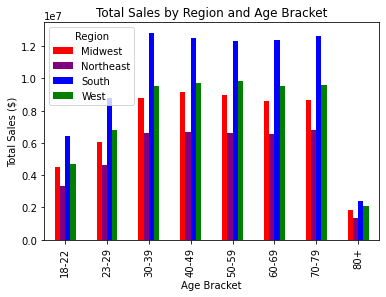

In [112]:
# Generate visualization
sales_region_age_bar = crosstab_sales_region_age.plot.bar(xlabel='Age Bracket', ylabel='Total Sales ($)', title='Total Sales by Region and Age Bracket', color=['red','purple','blue','green'])

In [113]:
# Export visualization
sales_region_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_region_age_bar.png'))

#### 9.1.2 Income

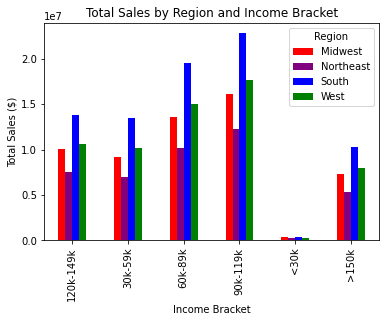

In [114]:
# Generate visualization
sales_region_income_bar = crosstab_sales_region_income.plot.bar(xlabel='Income Bracket', ylabel='Total Sales ($)', title='Total Sales by Region and Income Bracket', color=['red','purple','blue','green'])

In [115]:
# Export visualization
sales_region_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_region_income_bar.png'))

#### 9.1.3 Alcohol

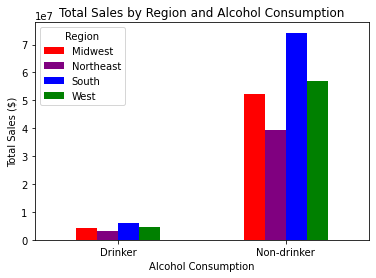

In [116]:
# Generate visualization
sales_region_alcohol_bar = crosstab_sales_region_alcohol.plot.bar(xlabel='Alcohol Consumption', ylabel='Total Sales ($)', title='Total Sales by Region and Alcohol Consumption', color=['red','purple','blue','green'], rot=0)

In [117]:
# Export visualization
sales_region_alcohol_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_region_alcohol_bar.png'))

#### 9.1.4 Pets

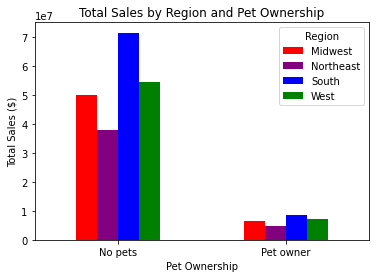

In [118]:
# Generate visualization
sales_region_pets_bar = crosstab_sales_region_pets.plot.bar(xlabel='Pet Ownership', ylabel='Total Sales ($)', title='Total Sales by Region and Pet Ownership', color=['red','purple','blue','green'], rot=0)

In [119]:
# Export visualization
sales_region_pets_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_region_pets_bar.png'))

#### 9.1.5 Children

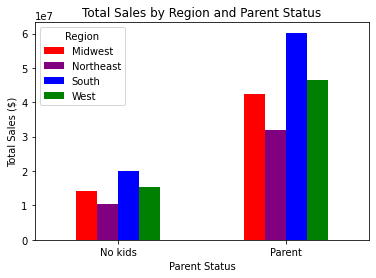

In [120]:
# Generate visualization
sales_region_parent_bar = crosstab_sales_region_parent.plot.bar(xlabel='Parent Status', ylabel='Total Sales ($)', title='Total Sales by Region and Parent Status', color=['red','purple','blue','green'], rot=0)

In [121]:
# Export visualization
sales_region_parent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_region_parent_bar.png'))

### 9.2 Total sales by department

#### 9.2.1 Age

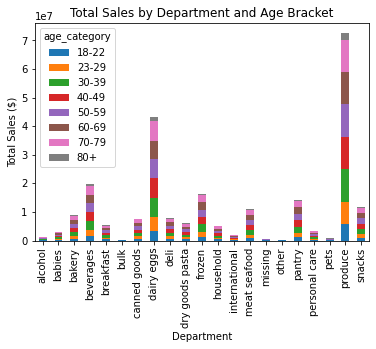

In [122]:
# Generate visualization
sales_department_age_bar = crosstab_sales_department_age.plot.bar(xlabel='Department', ylabel='Total Sales ($)', title='Total Sales by Department and Age Bracket', stacked=True)

In [123]:
# Export visualization
sales_department_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_department_age_bar.png'))

#### 9.2.2 Income

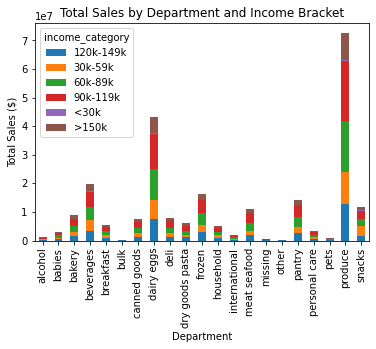

In [124]:
# Generate visualization
sales_department_income_bar = crosstab_sales_department_income.plot.bar(xlabel='Department', ylabel='Total Sales ($)', title='Total Sales by Department and Income Bracket', stacked=True)

In [125]:
# Export visualization
sales_department_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_department_income_bar.png'))

#### 9.2.3 Alcohol

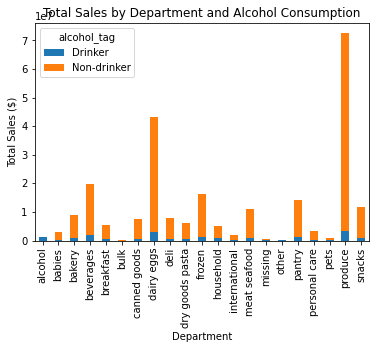

In [126]:
# Generate visualization
sales_department_alcohol_bar = crosstab_sales_department_alcohol.plot.bar(xlabel='Department', ylabel='Total Sales ($)', title='Total Sales by Department and Alcohol Consumption', stacked=True)

In [127]:
# Export visualization
sales_department_alcohol_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_department_alcohol_bar.png'))

#### 9.2.4 Pets

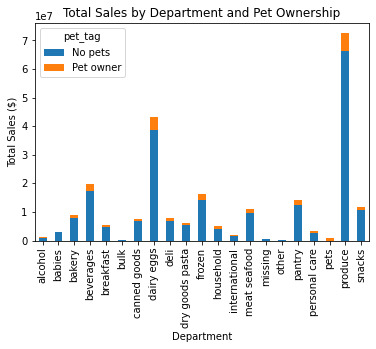

In [128]:
# Generate visualization
sales_department_pets_bar = crosstab_sales_department_pets.plot.bar(xlabel='Department', ylabel='Total Sales ($)', title='Total Sales by Department and Pet Ownership', stacked=True)

In [129]:
# Export visualization
sales_department_pets_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_department_pets_bar.png'))

#### 9.2.5 Children

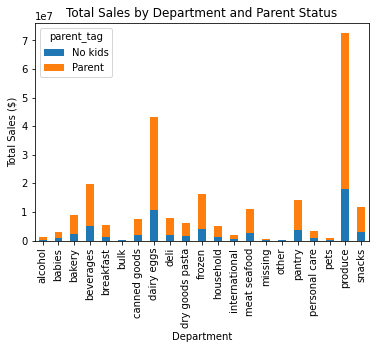

In [130]:
# Generate visualization
sales_department_parent_bar = crosstab_sales_department_parent.plot.bar(xlabel='Department', ylabel='Total Sales ($)', title='Total Sales by Department and Parent Status', stacked=True)

In [131]:
# Export visualization
sales_department_parent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_department_parent_bar.png'))

# 10. Export final dataset

In [ ]:
# Export final dataset
bigmerged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'absolute_final_4.10.pkl'))